In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Outdoor Temperature

In [4]:
temp1_df = pd.read_csv('outdoorTemp_d54e.csv', usecols=['bucketed_time', 'avg_temp'])
temp1_df['bucketed_time'] = pd.to_datetime(temp1_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp1_df.set_index('bucketed_time', inplace=True)
temp1_df.rename({'avg_temp': 'outdoor temp d54e'}, axis=1, inplace=True)

temp2_df = pd.read_csv('outdoorTemp_f877.csv', usecols=['bucketed_time', 'avg_temp'])
temp2_df['bucketed_time'] = pd.to_datetime(temp2_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp2_df.set_index('bucketed_time', inplace=True)
temp2_df.rename({'avg_temp': 'outdoor temp f877'}, axis=1, inplace=True)
outTemp_df = temp1_df.join(temp2_df)

In [5]:
temp1_df = pd.read_csv('indoorTemp_pm25.csv', usecols=['bucketed_time', 'avg_temp'])
temp1_df['bucketed_time'] = pd.to_datetime(temp1_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp1_df.set_index('bucketed_time', inplace=True)
temp1_df.rename({'avg_temp': 'indoor temp pm25'}, axis=1, inplace=True)

temp2_df = pd.read_csv('indoorTemp_radon.csv', usecols=['bucketed_time', 'avg_temp'])
temp2_df['bucketed_time'] = pd.to_datetime(temp2_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp2_df.set_index('bucketed_time', inplace=True)
temp2_df.rename({'avg_temp': 'indoor temp radon'}, axis=1, inplace=True)
inTemp_df = temp1_df.join(temp2_df)

In [6]:
start = outTemp_df.index[0]
start = start.replace(hour=0, minute=0, second=0)
newIndex = pd.date_range(start, start + dt.timedelta(days=40), freq='min')

In [7]:
outTempNew_df = outTemp_df.reindex(index=newIndex, method='pad')
inTempNew_df = inTemp_df.reindex(index=newIndex, method='pad')

In [8]:
dataset_df = outTempNew_df.join(inTempNew_df)
dataset_df['outdoor temp'] = dataset_df.loc[:,['outdoor temp d54e', 'outdoor temp f877']].mean(axis=1)
dataset_df['indoor temp'] = dataset_df.loc[:,['indoor temp pm25', 'indoor temp radon']].mean(axis=1)
dataset_df.fillna(method='bfill', inplace=True)

In [8]:
# dataset_df.to_csv('building4_data.csv')

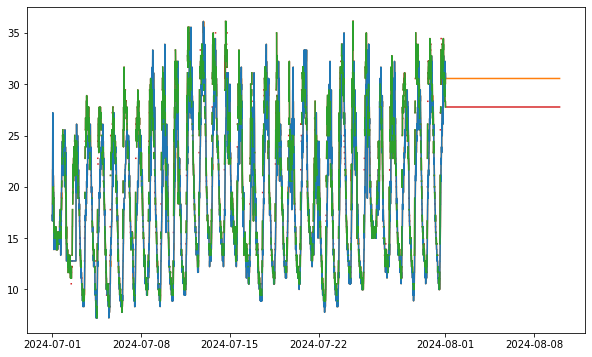

In [9]:
plt.figure(figsize=(10,6))
plt.plot(outTemp_df.index, outTemp_df['outdoor temp d54e'])
plt.plot(outTempNew_df.index, outTempNew_df['outdoor temp d54e'], zorder=-1)
plt.plot(outTemp_df.index, outTemp_df['outdoor temp f877'])
plt.plot(outTempNew_df.index, outTempNew_df['outdoor temp f877'], zorder=-1)

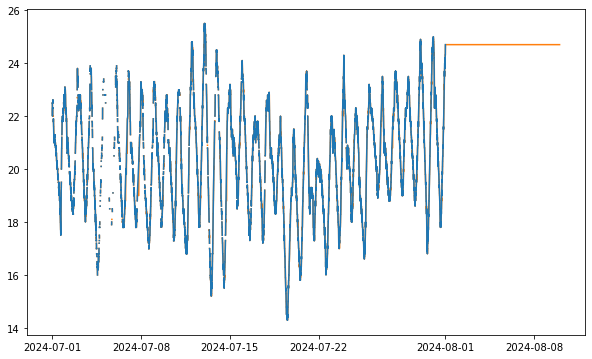

In [9]:
plt.figure(figsize=(10,6))
plt.plot(inTemp_df.index, inTemp_df['indoor temp pm25'])
plt.plot(inTempNew_df.index, inTempNew_df['indoor temp pm25'], zorder=-1)
plt.plot(inTemp_df.index, inTemp_df['indoor temp radon'])
plt.plot(inTempNew_df.index, inTempNew_df['indoor temp radon'], zorder=-1)
# plt.xlim([dt.datetime(2024, 5, 15), dt.datetime(2024, 5, 17)])

In [10]:
change_df = inTempNew_df[1:] - inTempNew_df[:-1]

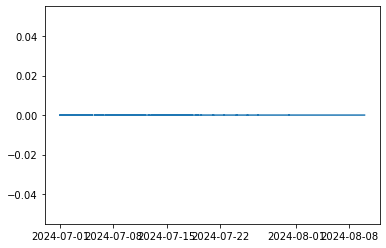

In [11]:
plt.figure()
plt.plot(change_df)

In [2]:
building_df = pd.read_csv('../../../results/4_out.csv', nrows=57600, usecols=['Time', 'Site Outdoor Air Temperature', 'living space Air Temperature', 'air source heat pump airloop Discharge Air Temp Sensor'])
dates = pd.to_datetime(building_df['Time'], format='%Y-%m-%d %H:%M:%S')
building_df.index = dates

NameError: name 'dataset_df' is not defined

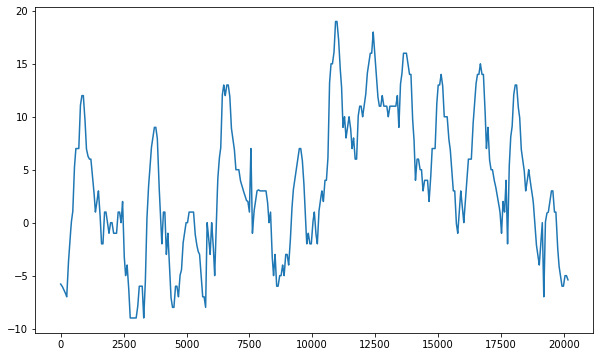

In [3]:
plt.figure(figsize=(10,6))
plt.plot(building_df['Site Outdoor Air Temperature'].values)
plt.plot(dataset_df['outdoor temp'].values)

(0.0, 1440.0)

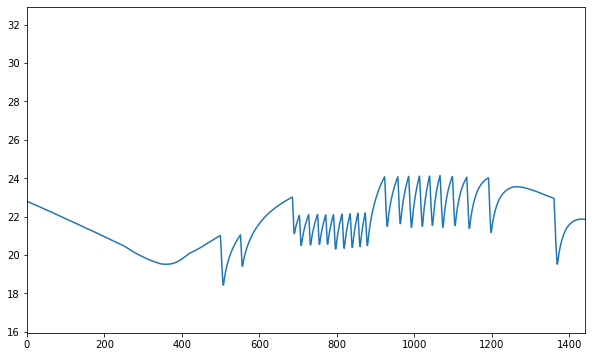

In [15]:
plt.figure(figsize=(10,6))
plt.plot(building_df['living space Air Temperature'].values)
# plt.plot(dataset_df['indoor temp'].values)
plt.xlim([0,1440])